In [24]:
import pandas as pd
import cudf
import numpy as np
from cuml import train_test_split
from cuml.linear_model import LinearRegression as cuLR
from sklearn.metrics import mean_squared_error, r2_score

In [25]:
lakes_df_depth = pd.read_csv('../data/LakeDepthPoints_July2017.csv')
lakes_df_data = pd.read_csv('../data/pts_merged_final.csv')
lakes_df_data.drop(['FID','Date'], axis = 1)

,Depth_m,b1_LC8_075,b2_LC8_075,b3_LC8_075,b4_LC8_075,b5_LC8_075,b6_LC8_075,b7_LC8_075,b8_LC8_075,b9_LC8_075,...,b26_LC8_07,b27_LC8_07,b28_LC8_07,b29_LC8_07,b30_LC8_07,b31_LC8_07,b32_LC8_07,b33_LC8_07,b34_LC8_07,b35_LC8_07
0,0.630000,164,271,199,42,27,16,605,824,3905,...,2625,165,100,136,643,98,59,80,381,593
1,0.672727,165,272,196,44,29,16,607,842,3750,...,2750,176,107,148,659,97,59,82,364,552
2,0.670588,154,260,193,40,32,19,592,798,3850,...,2105,208,123,166,800,123,73,98,475,594
3,0.822222,156,250,195,48,40,26,624,800,3250,...,1846,256,160,205,833,167,104,133,542,650
4,1.725000,117,164,78,38,23,17,713,1500,3079,...,2235,197,140,295,605,145,104,218,447,739
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23172,1.887000,103,284,242,731,494,397,363,426,141,...,1841,4796,1739,2041,676,3854,1398,1640,543,804
23173,2.012610,155,360,323,950,607,462,431,480,163,...,2056,3916,1686,1879,639,2981,1283,1430,486,761
23174,2.041730,199,427,447,1253,880,575,466,445,159,...,2179,4422,2061,1969,702,2889,1347,1286,459,653
23175,1.986000,241,552,557,1776,1211,809,437,433,136,...,2195,5025,2194,2174,682,3357,1466,1452,456,668


In [26]:
lakes_cdf_depth = cudf.DataFrame.from_pandas(lakes_df_depth)
lakes_cdf_data = cudf.DataFrame.from_pandas(lakes_df_data)
lakes_cdf_data.drop(['FID','Date'], axis = 1)

,Depth_m,b1_LC8_075,b2_LC8_075,b3_LC8_075,b4_LC8_075,b5_LC8_075,b6_LC8_075,b7_LC8_075,b8_LC8_075,b9_LC8_075,...,b26_LC8_07,b27_LC8_07,b28_LC8_07,b29_LC8_07,b30_LC8_07,b31_LC8_07,b32_LC8_07,b33_LC8_07,b34_LC8_07,b35_LC8_07
0,0.630000,164,271,199,42,27,16,605,824,3905,...,2625,165,100,136,643,98,59,80,381,593
1,0.672727,165,272,196,44,29,16,607,842,3750,...,2750,176,107,148,659,97,59,82,364,552
2,0.670588,154,260,193,40,32,19,592,798,3850,...,2105,208,123,166,800,123,73,98,475,594
3,0.822222,156,250,195,48,40,26,624,800,3250,...,1846,256,160,205,833,167,104,133,542,650
4,1.725000,117,164,78,38,23,17,713,1500,3079,...,2235,197,140,295,605,145,104,218,447,739
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23172,1.887000,103,284,242,731,494,397,363,426,141,...,1841,4796,1739,2041,676,3854,1398,1640,543,804
23173,2.012610,155,360,323,950,607,462,431,480,163,...,2056,3916,1686,1879,639,2981,1283,1430,486,761
23174,2.041730,199,427,447,1253,880,575,466,445,159,...,2179,4422,2061,1969,702,2889,1347,1286,459,653
23175,1.986000,241,552,557,1776,1211,809,437,433,136,...,2195,5025,2194,2174,682,3357,1466,1452,456,668


In [27]:
print("Main data")
lakes_cdf_data.dtypes

Main data


FID             int64
Depth_m       float64
Date           object
b1_LC8_075      int64
b2_LC8_075      int64
b3_LC8_075      int64
b4_LC8_075      int64
b5_LC8_075      int64
b6_LC8_075      int64
b7_LC8_075      int64
b8_LC8_075      int64
b9_LC8_075      int64
b10_LC8_07      int64
b11_LC8_07      int64
b12_LC8_07      int64
b13_LC8_07      int64
b14_LC8_07      int64
b15_LC8_07      int64
b16_LC8_07      int64
b17_LC8_07      int64
b18_LC8_07      int64
b19_LC8_07      int64
b20_LC8_07      int64
b21_LC8_07      int64
b22_LC8_07      int64
b23_LC8_07      int64
b24_LC8_07      int64
b25_LC8_07      int64
b26_LC8_07      int64
b27_LC8_07      int64
b28_LC8_07      int64
b29_LC8_07      int64
b30_LC8_07      int64
b31_LC8_07      int64
b32_LC8_07      int64
b33_LC8_07      int64
b34_LC8_07      int64
b35_LC8_07      int64
dtype: object

In [28]:
print("")

In [29]:
print(lakes_cdf_depth.head(5))
print(lakes_cdf_data.head(5))

   FID   Latitude   Longitude  Depth_m
0    0  70.201515 -153.302756      2.6
1    1  70.201512 -153.302801      2.1
2    2  70.201509 -153.302837      2.2
3    3  70.201512 -153.302864      2.1
4    4  70.201506 -153.302918      2.0
   FID   Depth_m            Date  b1_LC8_075  b2_LC8_075  b3_LC8_075  \
0    0  0.630000  7/22/2017 0:00         164         271         199   
1    1  0.672727  7/22/2017 0:00         165         272         196   
2    2  0.670588  7/22/2017 0:00         154         260         193   
3    3  0.822222  7/22/2017 0:00         156         250         195   
4    4  1.725000  7/22/2017 0:00         117         164          78   

   b4_LC8_075  b5_LC8_075  b6_LC8_075  b7_LC8_075  ...  b26_LC8_07  \
0          42          27          16         605  ...        2625   
1          44          29          16         607  ...        2750   
2          40          32          19         592  ...        2105   
3          48          40          26         624  ..

In [36]:
X = lakes_cdf_data.drop(['FID', 'Depth_m', 'Date'], axis = 1)
X = X.astype(np.float64)
X.dtypes

b1_LC8_075    float64
b2_LC8_075    float64
b3_LC8_075    float64
b4_LC8_075    float64
b5_LC8_075    float64
b6_LC8_075    float64
b7_LC8_075    float64
b8_LC8_075    float64
b9_LC8_075    float64
b10_LC8_07    float64
b11_LC8_07    float64
b12_LC8_07    float64
b13_LC8_07    float64
b14_LC8_07    float64
b15_LC8_07    float64
b16_LC8_07    float64
b17_LC8_07    float64
b18_LC8_07    float64
b19_LC8_07    float64
b20_LC8_07    float64
b21_LC8_07    float64
b22_LC8_07    float64
b23_LC8_07    float64
b24_LC8_07    float64
b25_LC8_07    float64
b26_LC8_07    float64
b27_LC8_07    float64
b28_LC8_07    float64
b29_LC8_07    float64
b30_LC8_07    float64
b31_LC8_07    float64
b32_LC8_07    float64
b33_LC8_07    float64
b34_LC8_07    float64
b35_LC8_07    float64
dtype: object

In [31]:
y = lakes_cdf_data['Depth_m']

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

In [33]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(18541, 35)
(4636, 35)
(18541,)
(4636,)


In [34]:
lakes_lr = cuLR(fit_intercept=True, normalize=True, algorithm='eig')
lakes_lr.fit(X_train, y_train)
y_pred = lakes_lr.predict(X_test)
r2 = r2_score(y_test.to_array(), y_pred.to_array())
print(r2)

0.2616009472107911


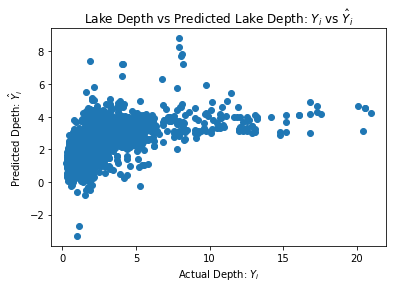

In [35]:
import cupy
import matplotlib.pyplot as plt

plt.scatter(y_test.to_array(), y_pred.to_array())
plt.xlabel("Actual Depth: $Y_i$")
plt.ylabel("Predicted Dpeth: $\hat{Y}_i$")
plt.title("Lake Depth vs Predicted Lake Depth: $Y_i$ vs $\hat{Y}_i$")

plt.show()

In [37]:
for i in range(20):
    print("Actual: ", y_test.to_array()[i], "Predicted", y_pred.to_array()[i])

Actual:  1.8065 Predicted 1.9185052448774513
Actual:  0.470095 Predicted 0.4469873828499602
Actual:  1.25711 Predicted 1.297668692967986
Actual:  1.68777 Predicted 1.1960434080655213
Actual:  0.6140909999999999 Predicted 1.3198290417213459
Actual:  1.9043299999999999 Predicted 2.23059141896708
Actual:  4.2234998 Predicted 2.4099716640499085
Actual:  2.5690801 Predicted 3.2080109703757085
Actual:  2.6346700000000003 Predicted 2.423288465382524
Actual:  2.4588598999999998 Predicted 3.013550065130751
Actual:  1.3048198999999998 Predicted 1.7168223224377597
Actual:  11.9200001 Predicted 4.611004396343483
Actual:  1.65457 Predicted 2.0838119820563312
Actual:  1.75483 Predicted 2.4019806308573624
Actual:  1.335 Predicted 0.7470972773660782
Actual:  1.19144 Predicted 1.5155928816657065
Actual:  0.794292 Predicted 1.1406334208830406
Actual:  0.480125 Predicted 1.0868354022735205
Actual:  1.86 Predicted 1.6299582961681702
Actual:  0.9036 Predicted 0.9266021715051846
